<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>TP3 - Équations différentielles</center></h1>

## Nom des membres de l'équipe:

### Nom, Prénom :  NI 
### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [1]:
import numpy as np
from numpy import empty
from scipy import array, arange, sqrt
import matplotlib.pyplot as plt
import astropy as atp
from astropy.time import Time
from astropy import constants as const
%pip install jplephem
from jplephem import Ephemeris
%pip install de421
import de421

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Introduction : 
En physique, les équations différentielles décrivent plusieurs concepts fondamentaux tels que le déplacement d'un système masse-ressort, la position d'un pendule, la déformation d'une poutre soumis à des contraintes, le courant dans un circuit RC,etc. On distingue les équations différentielles ordinaires (EDO) des équations différentielles partielles par la dépendance des fonctions inconnues. Cette étude concerne uniquement des équations différentielles ordinaires; des équations dans lesquelles les fonctions inconnues dépendent d'une seule variable, soit le temps.

Cette dernière porte sur la mécanique des corps célestes du système solaire qui est régi par la deuxième loi de Newton. Ce rapport se divise en trois sections principales; la première concerne les comètes, la deuxième la Terre et la troisième Mars. Dans chaque cas, l'orbite du corps en rotation autour du soleil est calculé à l'aide d'une méthode numérique différente. La méthode Runge-Kutta d'ordre 4 à pas constants et à pas adaptatifs est employée pour une comète donnée. Les calculs de l'orbite de la Terre et de ses énergies potentielle et cinétique sont réalisés à partir des méthodes de Verlet, de Runge-Kutta d'ordre 2 et de Bulirsch-Stoer, puis leur précision respective est comparée. Finalement la position de Mars le jour d’atterissage de l’astromobile Perseverance est calculée en utilisant la méthode de Bulirsch-Stoer.

# Mécanique céleste - comètes

## Question a.
Il est possible de séparer une équation différentielle d'ordre supérieur en plusieurs équations différentielles de premier ordre. La deuxième loi de Newton qui décrit le mouvement bidimensionnel d'une comète autour du soleil est exprimée par deux équations différentielles de deuxième ordre. On sépare ces deux équations pour les ramener à quatre équations différentielles du premier ordre.

La démarche détaillée est présentée pour le mouvement dans la direction $x$ seulement puisque la démarche pour le mouvement en $y$ est la même. 

L'équation différentielle de départ est
$$\frac{d^{2}x}{dt^{2}} = -GM \frac{x}{(x^{2}+y^{2})^{\frac{3}{2}}} = f(x, y).$$
On commence par faire des changements de variable pour chaque degré en $x$.
$$\delta = \frac{dx}{dt}= x'$$
$$\delta' = \frac{d \delta}{dt} = \frac{d^{2}x}{dt^{2}} = x''$$
On substitue ces changements de variable dans l'équation du mouvement et on obtient deux équations différentielles de premier ordre.
$$\delta = \frac{dx}{dt}$$
$$\frac{d \delta}{dt} = -GM \frac{x}{(x^{2}+y^{2})^{\frac{3}{2}}}$$

Dans le cas du mouvement en $y$, on obtient une réponse équivalente avec un changement de variable différent.
$$\gamma = \frac{dy}{dt}$$
$$\frac{d \gamma}{dt} = -GM \frac{y}{(x^{2}+y^{2})^{\frac{3}{2}}}$$

## Question b.
On utilise la méthode de Runge-Kutta d'ordre 4 pour résoudre ces quatre équations différentielles. Le pas $h$ reste constant dans ce programme.

<ipython-input-8-3f36d0eb73b3>:23: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  tpoints = arange(a, b, h)
<ipython-input-8-3f36d0eb73b3>:26: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r = array([x_0, y_0, delta_0, gamma_0], float)
<ipython-input-8-3f36d0eb73b3>:15: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  position = sqrt(x**2 + y**2)
<ipython-input-8-3f36d0eb73b3>:16: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  return array([delta, gamma, -G*M*x/position**3, -G*M*y/position**3], float)
<ipython-input-8-3f36d0eb73b3>:38: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  plt.plot(array(xpoints, float)/1000, array(ypoints, float)/1000)


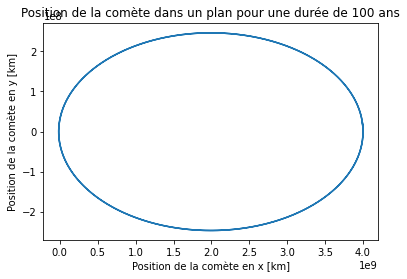

In [8]:
# Définition des constantes :
G = const.G.value #constante gravitationnelle en m^3/(kg * s^2)
M = const.M_sun.value #masse du soleil en kg

x_0 = 4*10**12 #en mètres
y_0 = 0
delta_0 = 0 #vitesse initiale en x
gamma_0 = 500 #vitesse initiale en y (m/s)

def f(r,t):
    x = r[0]
    y = r[1]
    delta = r[2]
    gamma = r[3]
    position = sqrt(x**2 + y**2)
    return array([delta, gamma, -G*M*x/position**3, -G*M*y/position**3], float)

a = 0 #temps initial
b = 3600*24*365*100 #temps final (100 ans en secondes)
N = 250000 #nombre de pas
h = (b-a)/N

tpoints = arange(a, b, h)
xpoints = []
ypoints = []
r = array([x_0, y_0, delta_0, gamma_0], float)

# Méthode RK4
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.plot(array(xpoints, float)/1000, array(ypoints, float)/1000)
plt.title("Position de la comète dans un plan pour une durée de 100 ans")
plt.xlabel("Position de la comète en x [km]")
plt.ylabel("Position de la comète en y [km]")
plt.show()

On observe que la période de révolution de cette comète autour du soleil est d'environ 49 ans. Le graphique ci-dessus présente la superposition d'au moins deux orbites complètes, soit 100 ans. Le pas $h$ a été sélectionné de sorte que le calcul des deux orbites soit suffisamment précis pour que ces dernières soient superposées. Le nombre $N$ de pas a été fixé à 250 000; toutefois pour une durée de 100 ans les orbites sont superposées pour un $N$ d'au moins 130 000. Si le nombre de pas $N$ est moindre, on obtient des orbites dont la trajectoire diffère davantage à mesure qu'on augmente le nombre d'années. Avec la méthode de Ruger-Kutta de dégré 4, il est possible d'augmenter le $h$ pour accélérer les calculs car cette méthode est plus précise que celles d'Euler ou de Ruger-Kutta de dégré 2 par exemple.

## Question c.
Le programme précédent est modifié pour que le pas $h$ soit adaptatif afin de comparer la justesse des calculs avec la méthode à pas constant. L'avantage du pas adaptatif est qu'il permet d'augmenter la vitesse de calcul là où la position de la comète varie peu avec le temps tout en gardant un pas suffisamment petit là où la vitesse de la comète augmente. La précision est fixée à 1 km par année.

In [3]:
precision = 1000/(3600*24*365) #en m/s     
    
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
    
erreur = (r1-r2)/30
rho = (30*h*precision)/(r1-r2)
h_prime = h*rho**(1/4)

NameError: name 'tpoints' is not defined

# Mécanique céleste - la Terre

méthode de Verlet ... orbitre Terre autour Soleil ... 2D ...

## Question d.

distance périhélie ... 

In [4]:
# Définition des constantes :
G = const.G.value
M = const.M_sun.value
m = const.M_earth.value


def f(x, y):
    # Dérivée de 2ème ordre
    r = np.sqrt(x**2 + y**2)
    return - G * M * x / r**3, - G * M * y / r**3


def Verlet(x0, y0, v_x0, v_y0, h, t_max):
    x_pts = [x0]
    y_pts = [y0]
    for i in range(int(t_max/h)):
        if i == 0:
            init = f(x0, y0)
            v_x_moitie = v_x0 + 1/2 * h * init[0]
            v_y_moitie = v_y0 + 1/2 * h * init[1]
            
            x_suiv = x0 + h * v_x_moitie
            y_suiv = y0 + h * v_y_moitie
            
        else :
            v_x_moitie = v_x_moitie + k_x
            v_y_moitie = v_y_moitie + k_y
            
            x_suiv = x_suiv + h * v_x_moitie
            y_suiv = y_suiv + h * v_y_moitie
    
        suiv = f(x_suiv, y_suiv)
        k_x = h * suiv[0]
        k_y = h * suiv[1]
    
        v_x_suiv = v_x_moitie + 1/2 * k_x
        v_y_suiv = v_y_moitie + 1/2 * k_y
        
        x_pts.append(x_suiv)
        y_pts.append(y_suiv)
        i += 1
        
    return x_pts, y_pts

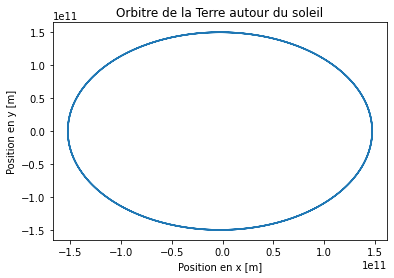

' TROUVER ZOOM ADÉQUAT POUR VOIR QUE LES COURBES SE SUPERPOSENT PAS EXACTEMENT?\nplt.figure()\nplt.plot(sln[0], sln[1])\nplt.xlabel("Position en x [m]")\nplt.ylabel("Position en y [m]")\nplt.xlim(0, 0.1e11)\nplt.ylim(1.475e11, 1.5e11)\nplt.show()\n'

In [5]:
# Données initiales du problème : 
x0 = 1.4710e11  # m
y0 = 0
v_x0 = 0  # m/s
v_y0 = 3.0287e4 # m/s
h = 3600  # s, donc 1 h


sln = Verlet(x0, y0, v_x0, v_y0, h, h*8760*3)  # t_max est exprimé en h et il y a 8760 heures par année

plt.figure()
plt.plot(sln[0], sln[1])
plt.title("Orbitre de la Terre autour du soleil")
plt.xlabel("Position en x [m]")
plt.ylabel("Position en y [m]")
plt.show()

""" TROUVER ZOOM ADÉQUAT POUR VOIR QUE LES COURBES SE SUPERPOSENT PAS EXACTEMENT?
plt.figure()
plt.plot(sln[0], sln[1])
plt.xlabel("Position en x [m]")
plt.ylabel("Position en y [m]")
plt.xlim(0, 0.1e11)
plt.ylim(1.475e11, 1.5e11)
plt.show()
"""

## Question e.

In [6]:
def Verlet_modif(x0, y0, v_x0, v_y0, h, t_max):
    x_pts = [x0]
    y_pts = [y0]
    t = np.linspace(h, t_max, int(t_max/h))
    E_pot = []
    E_cin = []
    
    for i in range(int(t_max/h)):
        if i == 0:
            init = f(x0, y0)
            v_x_moitie = v_x0 + 1/2 * h * init[0]
            v_y_moitie = v_y0 + 1/2 * h * init[1]
            
            x_suiv = x0 + h * v_x_moitie
            y_suiv = y0 + h * v_y_moitie
            
        else :
            v_x_moitie = v_x_moitie + k_x
            v_y_moitie = v_y_moitie + k_y
            
            x_suiv = x_suiv + h * v_x_moitie
            y_suiv = y_suiv + h * v_y_moitie
    
        suiv = f(x_suiv, y_suiv)
        k_x = h * suiv[0]
        k_y = h * suiv[1]
    
        v_x_suiv = v_x_moitie + 1/2 * k_x
        v_y_suiv = v_y_moitie + 1/2 * k_y
        
        x_pts.append(x_suiv)
        y_pts.append(y_suiv)
        r = np.sqrt(x_suiv**2 + y_suiv**2)
        v = np.sqrt(v_x_suiv**2 + v_y_suiv**2)
        E_pot.append(G * M * m / r)  # En absolu
        E_cin.append(1/2 * m * v**2)
        
        i += 1
        
    return x_pts, y_pts, t, E_pot, E_cin

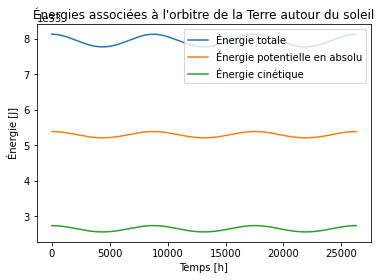

'\nTROUVER UNE MEILLEURE FAÇON DE LES COMPARER !!\n'

In [7]:
sln = Verlet_modif(x0, y0, v_x0, v_y0, h, h*8760*3)  # t_max est exprimé en h et il y a 8760 heures par année

E_tot = []
for i in range(len(sln[3])):
    E_tot.append(sln[3][i] + sln[4][i])

plt.figure()
plt.plot(sln[2]/3600, E_tot, label="Énergie totale")
plt.plot(sln[2]/3600, sln[3], label="Énergie potentielle en absolu")
plt.plot(sln[2]/3600, sln[4], label="Énergie cinétique")
plt.title("Énergies associées à l'orbitre de la Terre autour du soleil")
plt.xlabel("Temps [h]")
plt.ylabel("Énergie [J]")
plt.legend()
plt.show()

"""
TROUVER UNE MEILLEURE FAÇON DE LES COMPARER !!
"""

## Question f.

## Question g.
On calcule maintenant l'orbite de la Terre avec la méthode de Bulirsch-Stoer. La précision est fixée à 1 km par année et l'intervalle $H$ est de une semaine.

In [2]:
# Définition des constantes :
G = const.G.value
M = const.M_sun.value
m = const.M_earth.value

# Données initiales du problème : 
x0 = 1.4710e11  # m
y0 = 0
v_x0 = 0  # m/s
v_y0 = 3.0287e4 # m/s
H = 3600*24*7  # s, donc 1 semaine
precision = 1000 # m

def f(r):
    x = r[0]
    y = r[1]
    v_x = r[2]
    v_y = r[3]
    position = sqrt(x**2 + y**2)
    return array([v_x, v_y, -G*M*x/position**3, -G*M*y/position**3], float)

# Méthode de Bulirsch-Stoer 
n = 1 
r1 = r + 0.5*H*f(r) 
r2 = r + H*f(r1) 

R1 = empty([1,4] ,float) 
R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2)) 
 
erreur = 2*H*precision
while erreur>H*precision: 
    n += 1 
    h = H/n 

# Méthode de mi-chemin modifiée  
    r1 = r + 0.5*h*f(r) 
    r2 = r + h*f(r1) 
    for i in range(n-1): 
        r1 += h*f(r2) 
        r2 += h*f(r1) 
    
# Extrapolation Richardson 
    R2 = R1 
    R1 = empty([n,4] ,float) 
    R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2)) 
    for m in range(1,n): 
        epsilon= (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1) 
        R1[m] = R1[m-1] + epsilon 
    erreur= abs(epsilon[0])  

xpoints = []
ypoints = []
r = array([x0, y0, v_x0, v_y0], float)

plt.plot(xpoints, ypoints)
plt.title("Orbitre de la Terre autour du soleil")
plt.xlabel("Position en x [m]")
plt.ylabel("Position en x [m]")
plt.show()

NameError: name 'r' is not defined

# Mécanique céleste - Mars

## Question h.

In [15]:
# éphémérides
eph = Ephemeris(de421)
# dates
lancement=Time("2020-07-30")
atterissage=Time("2021-02-18")
# un nombre de jours juliens est attendu par la routine, d’où le .jd
# position en km, vitesse en km par jour
position, velocity = eph.position_and_velocity('mars',lancement.jd)
eph.position('mars',atterissage.jd)

array([[-1.94538523e+06],
       [ 2.14280417e+08],
       [ 9.83090643e+07]])